<a href="https://colab.research.google.com/github/NoteAP00/basic-machine-learning-using-scikit-learn/blob/master/007-K-Nearest-Neighbor-(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors

เราจะมาสร้างโมเดลแรก โดยใช้อัลกอริธึม K-Nearest Neighbors (KNN)

![alt text](https://cdn-images-1.medium.com/max/1600/0*Sk18h9op6uK9EpT8. "K-Nearest Neighbors: KNN")

อัลกอริธึมจะทำการเปรียบเทียบจุดใหม่ (New point) กับจุด (Point) ทั้งหมดที่อยู่ใน Training set เพื่อหาจุดที่ใกล้เคียงกับจุดใหม่ที่สุด โดยกำหนดจำนวนจุดที่ใกล้เคียงกับจุดใหม่จำนวน K จุด เช่น หากกำหนดให้ K=3 ดังนั้น จุดที่ใกล้เคียงกับจุดใหม่ทั้งสิ้นจำนวน 3 จุดจะถูกนำมาพิจารณา จากนั้นทำการกำหนด Label/Class ให้กับจุดใหม่ โดยตรวจสอบกับ Label ของทั้ง 3 จุด หากพบว่ามี Label ไหนมากที่สุด (Majority Vote) ก็จะกำหนดเป็น Label ให้กับจุดใหม่นั้น

จากตัวอย่าง
```
หากกำหนดให้ K=1 จุดที่ใกล้กับจุดใหม่ที่สุดคือ Class สี่เหลี่ยม ดังนั้น จุดใหม่นั้นจะถูกกำหนดให้มี Class เป็น สี่เหลี่ยม
หากกำหนดให้ K=3 จุดที่ใกล้กับจุดใหม่ที่สุดสามลำดับคือ Class สี่เหลี่ยม 1 จุด และสามเหลี่ยม 2 จุด ดังนั้นจุดใหม่
    จะถูกกำหนดให้มี Class เป็น สามเหลี่ยม
```

## สร้างโมเดล KNN

In [1]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], \
                                                    random_state=0)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# กำหนดให้ k=1
knn = KNeighborsClassifier(n_neighbors=1)

In [4]:
# สร้างโมเดล KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## ทำการพยากรณ์ (Making Predictions)

In [5]:
#ชื่อและลำดับของ Target
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [6]:
# กำหนดข้อมูลที่จะใช้ในการพยากรณ์
X_new = X_test[1]
y_new = y_test[1]

print("Test data: {}".format(X_new))
print("Label: {}".format(y_new))

Test data: [6.  2.2 4.  1. ]
Label: 1


In [7]:
# ทำการพยากรณ์ข้อมูล X_new
prediction = knn.predict([X_new])

In [8]:
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [1]
Predicted target name: ['versicolor']


```
จากข้อมูลที่ใช้ทดสอบ  
Test data: [6.  2.2 4.  1. ]  
  
พบว่าผลลัพธ์ที่พยากรณ์ คือ 1 (versicolor)  

เมื่อนำไปเปรียบเทียบกับ Label ที่แท้จริง (Actual Label) ของข้อมูลพบว่าเป็นการพยากรณ์ที่ "ถูกต้อง"
```

In [9]:
# ทดสอบอีกครั้ง ด้วยข้อมูลชุดใหม่
X_new = X_test[2]
y_new = y_test[2]

prediction = knn.predict([X_new])

print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [10]:
# ทดสอบอีกครั้ง ด้วยข้อมูลชุดใหม่
X_new = X_test[3]
y_new = y_test[3]

prediction = knn.predict([X_new])

print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['virginica']


# ทดสอบประสิทธิภาพของโมเดล (Evaluating the Model)

In [11]:
# ใช้ข้อมูลทั้งหมดจาก Test set
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [12]:
import numpy as np

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


## Accuracy Score

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9736842105263158

## Classification Report

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=iris_dataset['target_names']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred)))

Confusion Matrix: 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [16]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


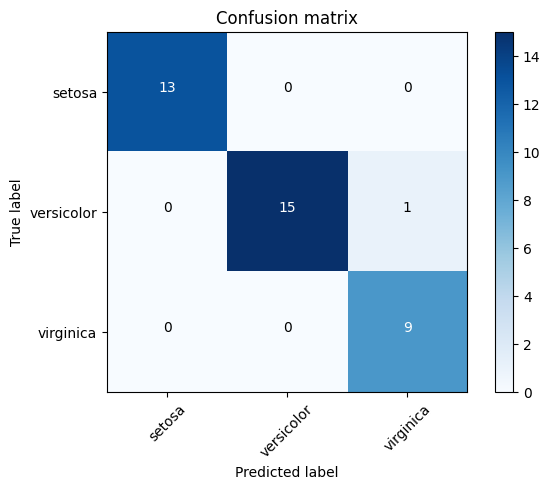

In [17]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Confusion matrix, without normalization')
print(cm)

plt.figure()
classes = iris_dataset.target_names
plot_confusion_matrix(cm, classes)

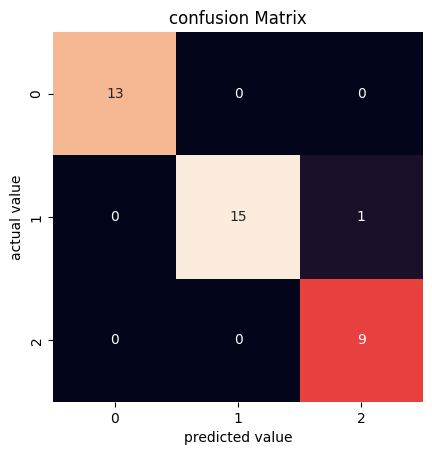

In [18]:
import seaborn as sns

sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.title('confusion Matrix')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

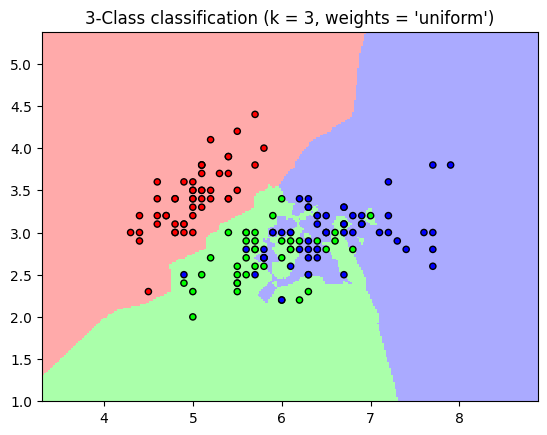

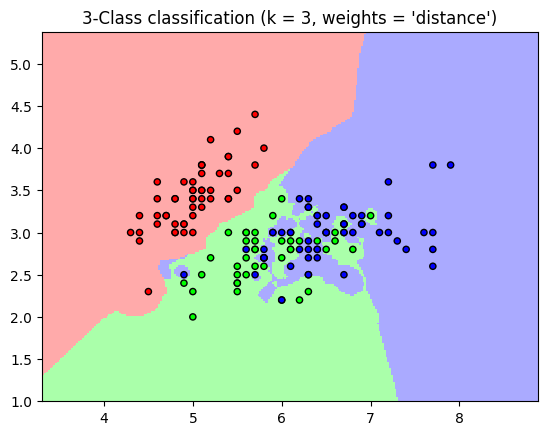

In [20]:
n_neighbors = 3

# import iris dataset
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

h = 0.02 # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

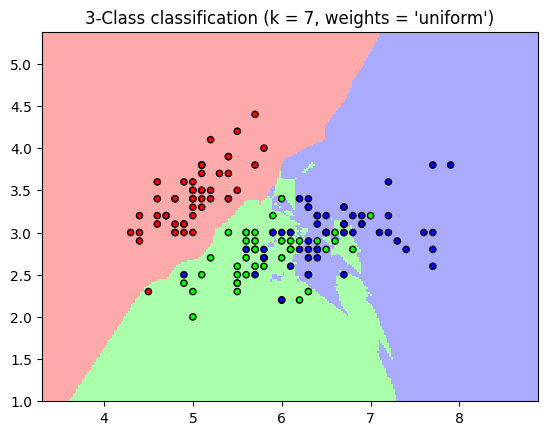

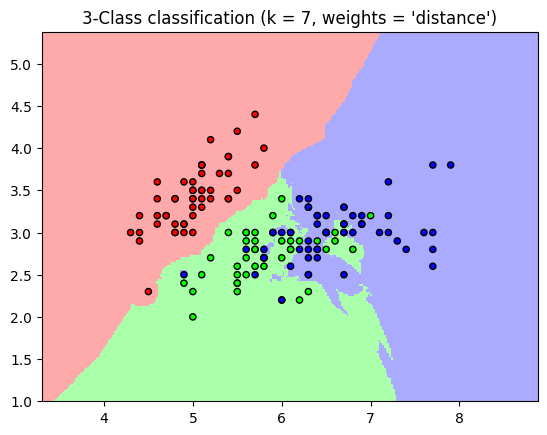

In [21]:
n_neighbors = 7

# import iris dataset
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

h = 0.02 # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## Diabetes dataset

### context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

source: https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn/notebook  

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/kevin-j-grimm/mlData/main/diabetes.csv')

In [25]:
# Print the first 5 roes of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# shape of the DataFrame
df.shape

(768, 9)

In [27]:
# create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [28]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [29]:
# create a test set of size of 40% of the dataset.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

## Create KNN Classifier

In [30]:
#  create a classifier using k-Nearest Neighbors algorithm.
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

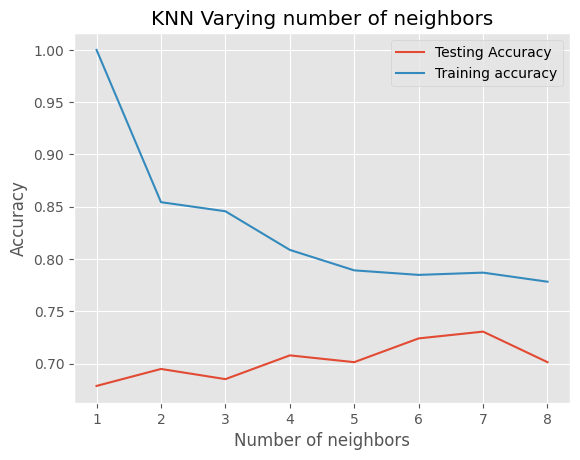

In [31]:
#Generate plot
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [32]:
# We can observe above that we get maximum testing accuracy for k=7.
#So create a KNeighborsClassifier with number of neighbors as 7.

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [33]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [34]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print("Accuracy", knn.score(X_test,y_test)*100)

Accuracy 73.05194805194806


### Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [37]:
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]])

### crosstab method of pandas
- confusion matrix

In [38]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


### Classification report

In [39]:
#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



### ROC (Reciever Operating Charecteristic) curve
It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.  

An ROC curve demonstrates several things:  
1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).  
2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.  
3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.  
4) The area under the curve is a measure of test accuracy.  

In [40]:
from sklearn.metrics import roc_curve

In [41]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

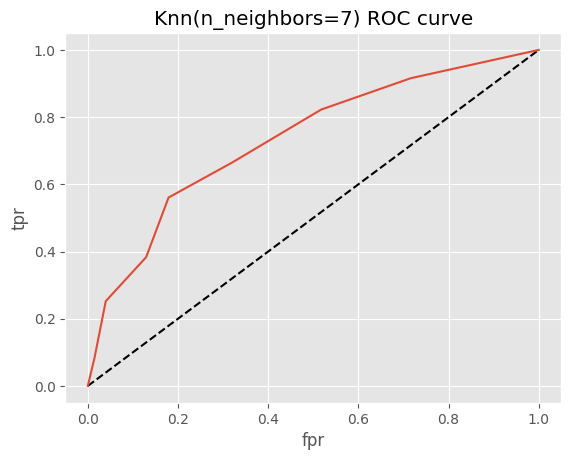

In [42]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [43]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.7345050448691124

### Cross validation
Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

### Hyperparameter tuning - Grid Search
The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.  

In [44]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [45]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50,2)}

In [46]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [47]:
knn_cv.best_score_

0.7552584670231729

In [48]:
knn_cv.best_params_

{'n_neighbors': 13}

knn classifier with number of neighbors as 14 achieves the best score/accuracy of 0.7578, about 76%